# <p style="padding:10px;background-color:#d64161 ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Assignment  69: Ensemble Techniques 5 - Abhishek Waghcahure</p>

## Question 1 : You are working on machine learning project where you have containing numerical and categorical features. You have identified that some features are highly correlated and there are missing values in some of the columns. You want to build a pipeline that automates feature engineering process and handles missing values.

Design a Pipeline that includes following steps:

Use an automated method to identify important features of dataset

Use a numerical pipeline that includes following steps:
Impute missing values in numeric columns with mean
Scale the numerical columns using standardisation

Create a categorical pipeline that includes following steps:
Impute missing values in categorical columns with most frequent data
One Hot Encode the categorical columns
Combine the numerical and categorical pipelines using a ColumnTransformer
Use Random Forest Classifier to build final model
Evaluate accuracy of model on the test dataset

Note : Your Solution should include code snippets for each step of pipeline and a brief explaination of each step. You should also provide an interpretation of results and suggest possible improvements for pipeline

---

### Step 1 - Read DataSet

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.shape

(1470, 35)

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
X = df.drop(['Attrition'], axis = 1)
y = df['Attrition']

In [15]:
X.info()
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [14]:
print(y.info())
print(y.shape)

<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: Attrition
Non-Null Count  Dtype 
--------------  ----- 
1470 non-null   object
dtypes: object(1)
memory usage: 11.6+ KB
None
(1470,)


In [20]:
cat_cols = list(X.select_dtypes(include='object').columns)
num_cols = list(X.select_dtypes(exclude='object').columns)

In [21]:
cat_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [26]:
print(num_cols)
print(len(num_cols))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
26


In [28]:
from sklearn.feature_selection import SelectKBest, f_classif
X_num = X[num_cols]
k_best_numerical = SelectKBest(f_classif,k=10)
k_best_numerical.fit_transform(X_num,y)
selected_num_features = list(X_num.columns[k_best_numerical.get_support()])
selected_num_features

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 4 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


['Age',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [30]:
from sklearn.feature_selection import SelectKBest, chi2
X_cat = X[cat_cols]
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
X_cat_encoded = pd.DataFrame(oe.fit_transform(X_cat),columns=oe.get_feature_names_out())
k_best_categorical = SelectKBest(chi2,k=5)
k_best_categorical.fit_transform(X_cat_encoded,y)
selected_cat_features = list(X_cat_encoded.columns[k_best_categorical.get_support()])
selected_cat_features

['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

In [31]:
X_cat_encoded

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,2.0,2.0,1.0,0.0,7.0,2.0,0.0,1.0
1,1.0,1.0,1.0,1.0,6.0,1.0,0.0,0.0
2,2.0,1.0,4.0,1.0,2.0,2.0,0.0,1.0
3,1.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0
4,2.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1465,1.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0
1466,2.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0
1467,2.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0
1468,1.0,2.0,3.0,1.0,7.0,1.0,0.0,0.0


In [34]:
selected_features = selected_num_features + selected_cat_features
selected_features


['Age',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [35]:
X_selected = X[selected_features]
X_selected.head()

,Age,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Department,EducationField,JobRole,MaritalStatus,OverTime
0,41,3,2,4,5993,0,8,6,4,5,Sales,Life Sciences,Sales Executive,Single,Yes
1,49,2,2,2,5130,1,10,10,7,7,Research & Development,Life Sciences,Research Scientist,Married,No
2,37,2,1,3,2090,0,7,0,0,0,Research & Development,Other,Laboratory Technician,Single,Yes
3,33,3,1,3,2909,0,8,8,7,0,Research & Development,Life Sciences,Research Scientist,Married,Yes
4,27,3,1,2,3468,1,6,2,2,2,Research & Development,Medical,Laboratory Technician,Married,No


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected,y,test_size=0.2,random_state=42,stratify=y)

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler

# Numeric Pipeline creation
num_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                               ('scaler',StandardScaler())])

# Categorical Pipeline creation
cat_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                               ('one_hot_encoder',OneHotEncoder()),
                               ('scaler',StandardScaler(with_mean=False))])

In [40]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([('num_pipeline',num_pipeline,selected_num_features),
                                  ('cat_pipeline',cat_pipeline,selected_cat_features)])

In [47]:
X_train_transformed = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test_transformed = pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [48]:
preprocessor.get_feature_names_out()

array(['num_pipeline__Age', 'num_pipeline__JobInvolvement',
       'num_pipeline__JobLevel', 'num_pipeline__JobSatisfaction',
       'num_pipeline__MonthlyIncome', 'num_pipeline__StockOptionLevel',
       'num_pipeline__TotalWorkingYears', 'num_pipeline__YearsAtCompany',
       'num_pipeline__YearsInCurrentRole',
       'num_pipeline__YearsWithCurrManager',
       'cat_pipeline__Department_Human Resources',
       'cat_pipeline__Department_Research & Development',
       'cat_pipeline__Department_Sales',
       'cat_pipeline__EducationField_Human Resources',
       'cat_pipeline__EducationField_Life Sciences',
       'cat_pipeline__EducationField_Marketing',
       'cat_pipeline__EducationField_Medical',
       'cat_pipeline__EducationField_Other',
       'cat_pipeline__EducationField_Technical Degree',
       'cat_pipeline__JobRole_Healthcare Representative',
       'cat_pipeline__JobRole_Human Resources',
       'cat_pipeline__JobRole_Laboratory Technician',
       'cat_pipeline__Job

In [50]:
X_train_transformed.head()

,num_pipeline__Age,num_pipeline__JobInvolvement,num_pipeline__JobLevel,num_pipeline__JobSatisfaction,num_pipeline__MonthlyIncome,num_pipeline__StockOptionLevel,num_pipeline__TotalWorkingYears,num_pipeline__YearsAtCompany,num_pipeline__YearsInCurrentRole,num_pipeline__YearsWithCurrManager,...,cat_pipeline__JobRole_Manufacturing Director,cat_pipeline__JobRole_Research Director,cat_pipeline__JobRole_Research Scientist,cat_pipeline__JobRole_Sales Executive,cat_pipeline__JobRole_Sales Representative,cat_pipeline__MaritalStatus_Divorced,cat_pipeline__MaritalStatus_Married,cat_pipeline__MaritalStatus_Single,cat_pipeline__OverTime_No,cat_pipeline__OverTime_Yes
0,1.090194,1.795282,1.762189,-0.647997,2.026752,2.613100,2.261482,-0.665706,-0.625365,-0.616406,...,0.0,0.0,0.0,0.0,0.000000,2.399905,0.000000,0.0,2.205793,0.000000
1,-1.634828,0.373564,-0.986265,1.153526,-0.864408,0.247430,-1.072675,-0.830071,-0.905635,-0.897047,...,0.0,0.0,0.0,0.0,0.000000,0.000000,2.006697,0.0,2.205793,0.000000
2,0.981193,0.373564,1.762189,0.252765,2.347706,0.247430,1.492061,0.813578,1.336527,1.348076,...,0.0,0.0,0.0,0.0,0.000000,0.000000,2.006697,0.0,2.205793,0.000000
3,-1.307825,0.373564,-0.986265,0.252765,-0.956202,-0.935405,-0.559727,-0.008246,-0.064824,0.506155,...,0.0,0.0,0.0,0.0,4.544641,0.000000,2.006697,0.0,2.205793,0.000000
4,0.654191,0.373564,-0.070114,0.252765,-0.185956,0.247430,-0.175017,0.156119,0.775986,0.786795,...,0.0,0.0,0.0,0.0,0.000000,2.399905,0.000000,0.0,0.000000,2.205793


In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=21)
rfc.fit(X_train_transformed,y_train)

RandomForestClassifier(max_depth=8, random_state=21)

In [58]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(rfc,X_train_transformed,y_train,cv=skf,scoring='accuracy')
scores

array([0.85169492, 0.86382979, 0.85957447, 0.88085106, 0.84680851])

In [59]:
parameters = {
    'n_estimators':[10,50,100,200,300,400],
    'max_depth':[4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[2,5,10]
}


In [60]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=parameters,
                          cv=skf,
                          n_iter=50,
                          scoring='accuracy',
                          verbose=3)


In [61]:
rscv.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=9, min_samples_leaf=6, min_samples_split=2, n_estimators=300;, score=0.852 total time=   0.3s
[CV 2/5] END max_depth=9, min_samples_leaf=6, min_samples_split=2, n_estimators=300;, score=0.868 total time=   0.2s
[CV 3/5] END max_depth=9, min_samples_leaf=6, min_samples_split=2, n_estimators=300;, score=0.855 total time=   0.2s
[CV 4/5] END max_depth=9, min_samples_leaf=6, min_samples_split=2, n_estimators=300;, score=0.851 total time=   0.3s
[CV 5/5] END max_depth=9, min_samples_leaf=6, min_samples_split=2, n_estimators=300;, score=0.855 total time=   0.2s
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.843 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.860 total time=   0.0s
[C

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='accuracy', verbose=3)

In [62]:
rscv.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 10}

In [63]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=400)

In [64]:
ypred_test = best_rfc.predict(X_test_transformed)
ypred_test

array(['Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No'

<Axes: >

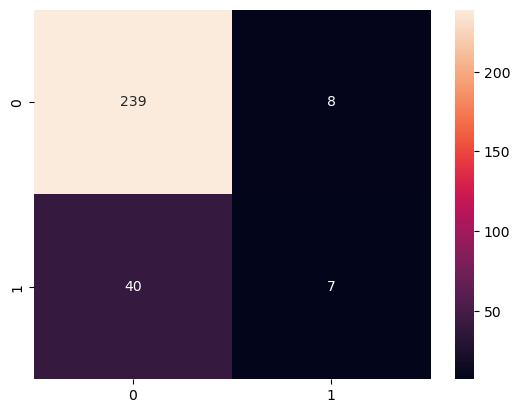

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(y_test, ypred_test)
sns.heatmap(cf,annot=True,fmt='d')

In [66]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, ypred_test)
print(f'Accuracy on testing data is {acc:.4f}')

Accuracy on testing data is 0.8367
